In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/Users/yuhongliu/Library/Python/3.10/lib/python/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
"""
first, we need to import all the data in ov_datasets.csv
which has gathered all tumor volume data in McCart 2021 et al. with webplotdigitizer

data structure:
1. the first 20 columns are the tumor volume under vvDD condition
   specifying x (time) and y (tumor volume) for each two columns, totalling 10 samples
   the first row can be ignored
   the 1-5 rows are the 5 time points for all 10 samples
2. the next 20 columns are the tumor volume under normal/PBS condition with similar structure
3. the last four columns are the mean and stde data of the tumor volume under vvDD condition and normal/PBS condition
   each two columns specify one condition, respectively the x and y
   each three rows specify one time point: mean, stde+, and stde-
   again, the first row can be ignored

"""

df = pd.read_csv('/Users/yuhongliu/Documents/OV/data/ov_datasets_v2.csv')

# Extract tumor volume data for vvDD condition
tumor_vol_vvDD = df.iloc[1:6, 1:20:2].values  # Select every other column starting from the second column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_vvDD_df = pd.DataFrame(tumor_vol_vvDD, index=[3, 4, 5, 6, 7], columns=[f'vvDD_sample_{i+1}' for i in range(10)])

# Extract tumor volume data for normal/PBS condition
tumor_vol_pbs = df.iloc[1:6, 21:40:2].values  # Select every other column starting from the 21 column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_pbs_df = pd.DataFrame(tumor_vol_pbs, index=[3, 4, 5, 6, 7], columns=[f'pbs_sample_{i+1}' for i in range(10)])

# Extract mean and standard deviation data for vvDD and PBS conditions, for comparison with the two dataframes above
vvDD_mean_stde_data = df.iloc[1:, -3].values
pbs_mean_stde_data = df.iloc[1:, -1].values
# Create DataFrames for vvDD and PBS data
vvDD_mean_stde_df = pd.DataFrame(vvDD_mean_stde_data.reshape(-1, 3), 
                                 index=[3, 4, 5, 6, 7], 
                                 columns=['mean', 'stde_plus', 'stde_minus'])

pbs_mean_stde_df = pd.DataFrame(pbs_mean_stde_data.reshape(-1, 3), 
                                index=[3, 4, 5, 6, 7], 
                                columns=['mean', 'stde_plus', 'stde_minus'])

# convert data to numeric type
tumor_vol_vvDD_df = tumor_vol_vvDD_df.apply(pd.to_numeric, errors='coerce')
tumor_vol_pbs_df = tumor_vol_pbs_df.apply(pd.to_numeric, errors='coerce')
vvDD_mean_stde_df = vvDD_mean_stde_df.apply(pd.to_numeric, errors='coerce')
pbs_mean_stde_df = pbs_mean_stde_df.apply(pd.to_numeric, errors='coerce')


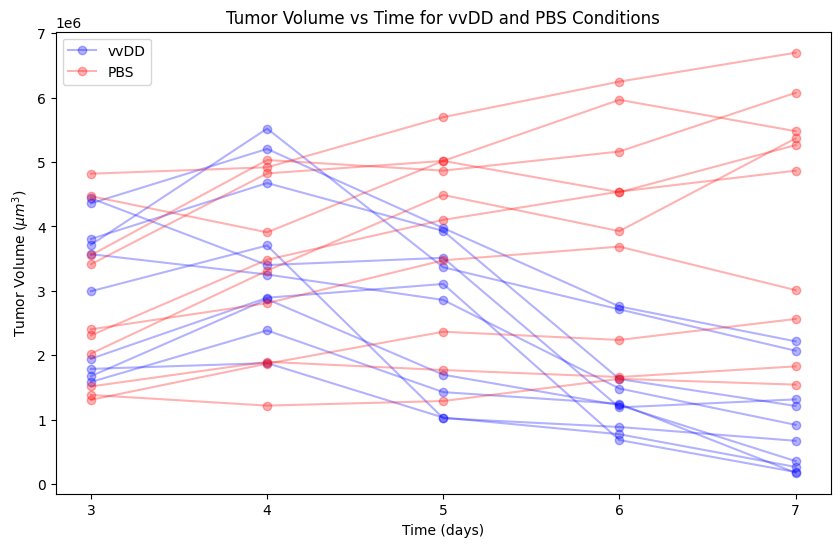

In [3]:
# plot the tumor volume data for vvDD and PBS condition
plt.figure(figsize=(10, 6))

# Plot vvDD data
for i in range(10):
    plt.plot(tumor_vol_vvDD_df.index, tumor_vol_vvDD_df.iloc[:, i], 
             marker='o', linestyle='-', color='blue', alpha=0.3, label='vvDD' if i == 0 else "")

# Plot PBS data
for i in range(10):
    plt.plot(tumor_vol_pbs_df.index, tumor_vol_pbs_df.iloc[:, i], 
             marker='o', linestyle='-', color='red', alpha=0.3, label='PBS' if i == 0 else "")

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume ($\mu m^3$)')
plt.title('Tumor Volume vs Time for vvDD and PBS Conditions')
plt.legend()
plt.grid(False)
plt.xticks([3, 4, 5, 6, 7])
plt.show()

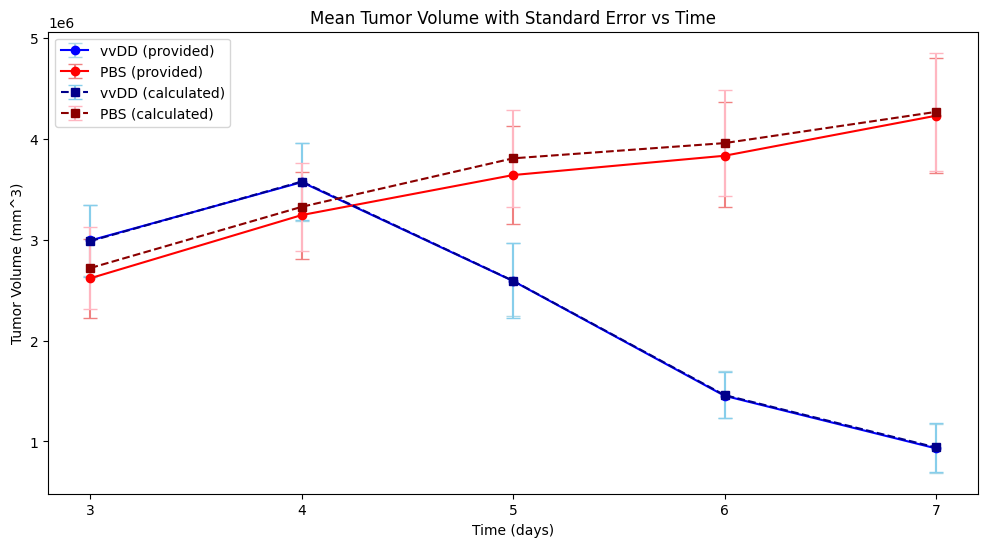

In [4]:
# plot the mean and stde data for vvDD and PBS condition

# Calculate mean and standard error for vvDD
vvDD_mean = tumor_vol_vvDD_df.mean(axis=1)
vvDD_se = tumor_vol_vvDD_df.sem(axis=1)
# Calculate mean and standard error for PBS
pbs_mean = tumor_vol_pbs_df.mean(axis=1)
pbs_se = tumor_vol_pbs_df.sem(axis=1)

# Plot both provided and calculated data
plt.figure(figsize=(12, 6))
# Plot provided data
plt.errorbar(vvDD_mean_stde_df.index, vvDD_mean_stde_df['mean'], 
             yerr=[vvDD_mean_stde_df['mean'] - vvDD_mean_stde_df['stde_minus'], 
                   vvDD_mean_stde_df['stde_plus'] - vvDD_mean_stde_df['mean']],
             fmt='o-', color='blue', ecolor='lightblue', capsize=5, label='vvDD (provided)')
plt.errorbar(pbs_mean_stde_df.index, pbs_mean_stde_df['mean'], 
             yerr=[pbs_mean_stde_df['mean'] - pbs_mean_stde_df['stde_minus'], 
                   pbs_mean_stde_df['stde_plus'] - pbs_mean_stde_df['mean']],
             fmt='o-', color='red', ecolor='lightcoral', capsize=5, label='PBS (provided)')
# Plot calculated data
plt.errorbar(vvDD_mean.index, vvDD_mean, yerr=vvDD_se,
             fmt='s--', color='darkblue', ecolor='skyblue', capsize=5, label='vvDD (calculated)')
plt.errorbar(pbs_mean.index, pbs_mean, yerr=pbs_se,
             fmt='s--', color='darkred', ecolor='lightpink', capsize=5, label='PBS (calculated)')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm^3)')
plt.title('Mean Tumor Volume with Standard Error vs Time')
plt.legend()
plt.grid(False)
plt.xticks([3, 4, 5, 6, 7])
plt.show()



In [ ]:
# TODO: why the calculated data is not matching with the provided data?